In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
#df = pd.read_csv("../Week5/Day1/lab-eda-univariate/amz_uk_price_prediction_dataset.csv")

df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [4]:
### Part 1: Understanding Product Categories

#Business Question**: 
#What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?
# 1. **Frequency Tables**:
#    - Generate a frequency table for the product `category`.
 #   - Which are the top 5 most listed product categories?

In [5]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [6]:
df.shape

(2443651, 9)

In [7]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [8]:
frequency_table = df['category'].value_counts()

frequency_table


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Motorbike Chassis                            107
Alexa Built-In Devices                       107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [9]:

# Top 5 most listed categories
top_5_categories = frequency_table.head(5)
print("\nTop 5 Most Listed Product Categories:")
print(top_5_categories)


Top 5 Most Listed Product Categories:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


In [10]:
#2. **Visualizations**:
#- Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
#- For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


In [11]:

top_categories= pd.crosstab(index = df["category"],  
                              columns="count")     
top_categories

col_0,count
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


/var/folders/j0/mq_mr2hj0hl8xv4kfq895gk40000gn/T/ipykernel_72996/2570087221.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values[:15],


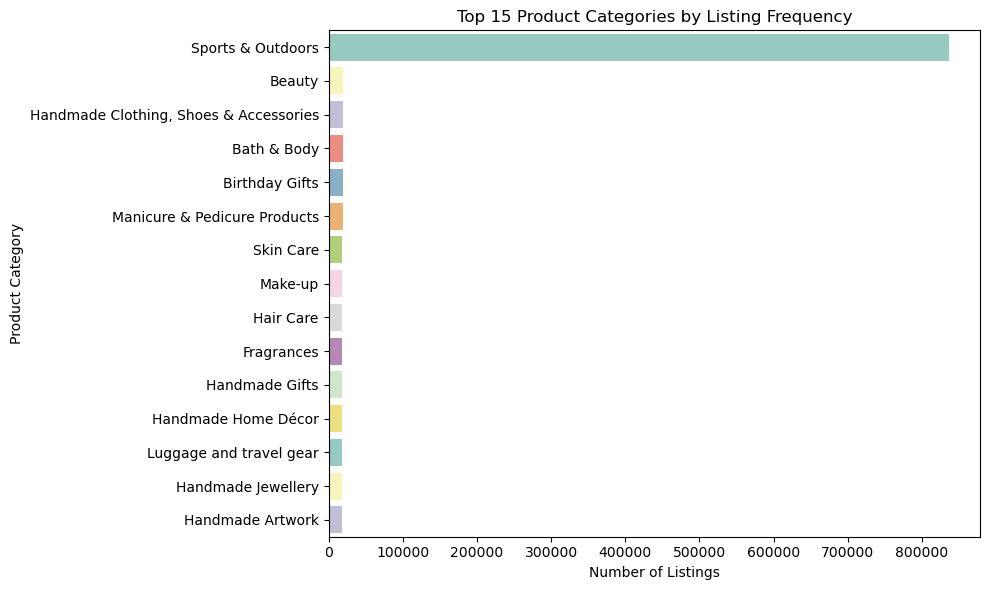

In [12]:


category_counts = df['category'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values[:15], 
            y=category_counts.index[:15], 
            palette="Set3")
plt.title('Top 15 Product Categories by Listing Frequency')
plt.xlabel('Number of Listings')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


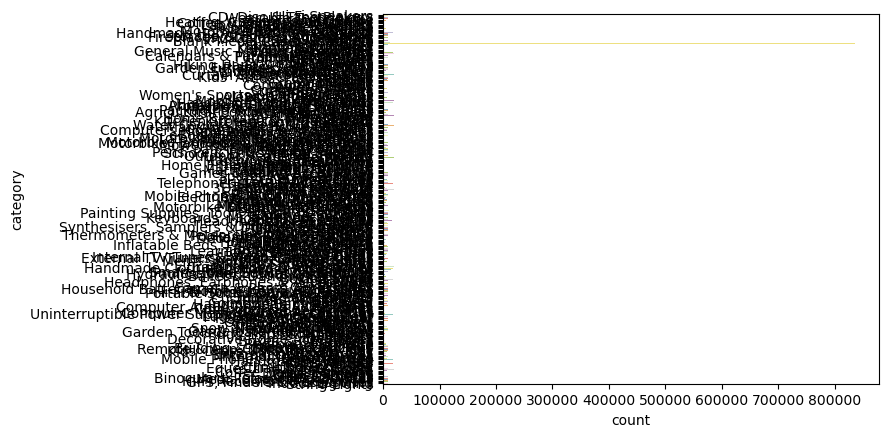

In [13]:
fig, axes = plt.subplots()
sns.countplot(data=df, y='category', palette="Set3", hue='category',
              legend=False, ax=axes);
plt.show()

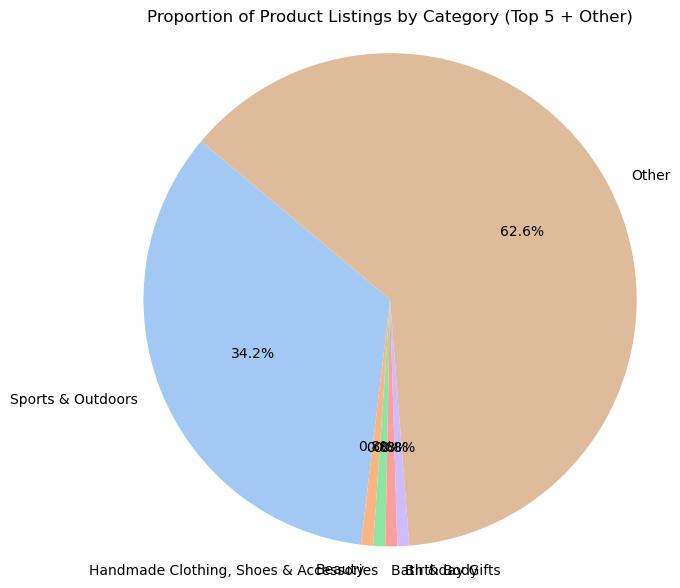

In [14]:
# Top N categories for pie chart (e.g., Top 5)
top_n = 5
top_categories = frequency_table.head(top_n)
other = frequency_table.iloc[top_n:].sum()
top_categories['Other'] = other

# Pie chart
plt.figure(figsize=(7, 7))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Product Listings by Category (Top 5 + Other)')
plt.axis('equal')
plt.show()


In [15]:
### Part 2: Delving into Product Pricing

#**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

#1. **Measures of Centrality**:
 #   - Calculate the mean, median, and mode for the `price` of products.
  #  - What's the average price point of products listed? How does this compare with the most common price point (mode)?

#2. **Measures of Dispersion**:
 #   - Determine the variance, standard deviation, range, and interquartile range for product `price`.
  #  - How varied are the product prices? Are there any indicators of a significant spread in prices?

#3. **Visualizations**:
 #   - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
  #  - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 


In [16]:
mean_price = df['price'].mean()  #average price point of products listed?
median_price = df['price'].median()
mode_price = df['price'].mode()[0] #most common price point
mean_price, median_price, mode_price



# skewness_price = df['price'].skew()

(np.float64(89.24380943923663), 19.09, np.float64(9.99))

In [17]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
interquartile = q3 - q1

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.48532256528,
 345.60886175352226,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

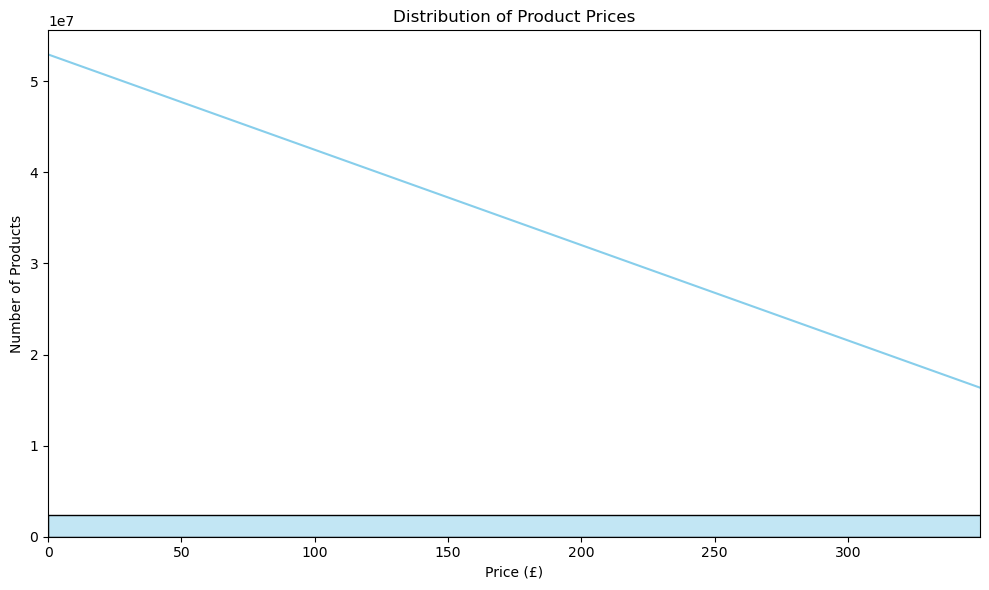

In [18]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, color='skyblue', kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price (£)')
plt.ylabel('Number of Products')
plt.xlim(0, df['price'].quantile(0.95))  # Optional: limit x-axis to 95th percentile
plt.tight_layout()
plt.show()

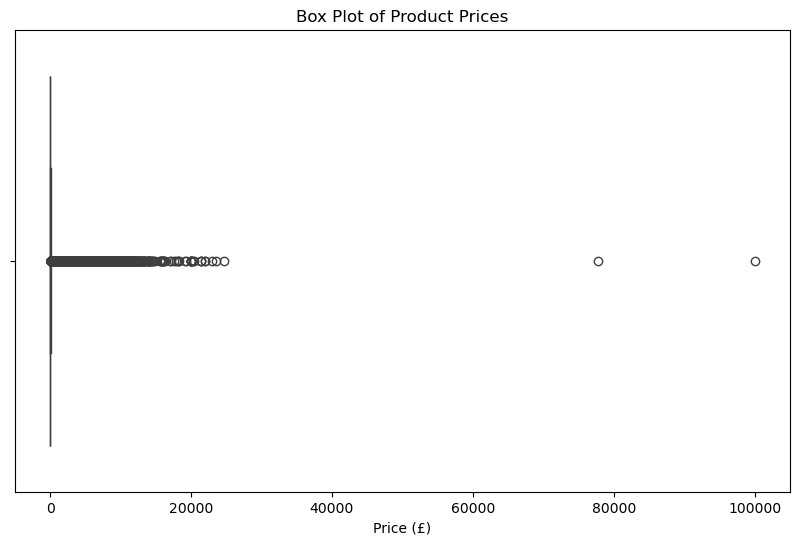

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Product Prices')
plt.xlabel('Price (£)')
plt.show()

In [ ]:
### Part 3: Unpacking Product Ratings

#**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

#1. **Measures of Centrality**:
 #   - Calculate the mean, median, and mode for the `rating` of products.
  #  - How do customers generally rate products? Is there a common trend?

#2. **Measures of Dispersion**:
 #   - Determine the variance, standard deviation, and interquartile range for product `rating`.
  #  - Are the ratings consistent, or is there a wide variation in customer feedback?

#3. **Shape of the Distribution**:
 #   - Calculate the skewness and kurtosis for the `rating` column. 
  #  - Are the ratings normally distributed, or do they lean towards higher or lower values?

#4. **Visualizations**:
 #   - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [82]:
mean_ratings = df['stars'].mean()  #average price point of products listed?
median_ratings = df['stars'].median()
mode_ratings = df['stars'].mode()[0] #most common price point
mean_ratings, median_ratings, mode_ratings

(np.float64(2.152836472966065), 0.0, np.float64(0.0))

In [74]:
ratings_counts = df['stars'].value_counts().sort_index()
print(rating_counts)

stars
0.0    1225641
1.0       8484
1.1          3
1.2         23
1.3         78
1.4        149
1.5        404
1.6        147
1.7        177
1.8        249
1.9        300
2.0       3901
2.1        540
2.2        602
2.3        734
2.4       1060
2.5       2103
2.6       1579
2.7       2104
2.8       2306
2.9       3341
3.0      12819
3.1       4679
3.2       5771
3.3       8269
3.4      10355
3.5      14673
3.6      16219
3.7      21137
3.8      27876
3.9      36555
4.0      66089
4.1      65115
4.2      86871
4.3     112564
4.4     136165
4.5     151577
4.6     136995
4.7      94566
4.8      41858
4.9      11081
5.0     128492
Name: count, dtype: int64


In [81]:
variance_ratings = df['stars'].var()
std_dev_ratings = df['stars'].std()
min_ratings = df['stars'].min()
max_ratings = df['stars'].max()
range_ratings = max_rating - min_rating
quantiles_ratings = df['stars'].quantile([0.25, 0.5, 0.75])
q1 = df['stars'].quantile(0.25)
q3 = df['stars'].quantile(0.75)
interquartile = q3 - q1

variance_ratings, std_dev_ratings, min_ratings, max_ratings, range_ratings, quantiles_ratings

(4.81743402976196,
 2.1948653785054697,
 0.0,
 5.0,
 5.0,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64
Standard Deviation: 2.19


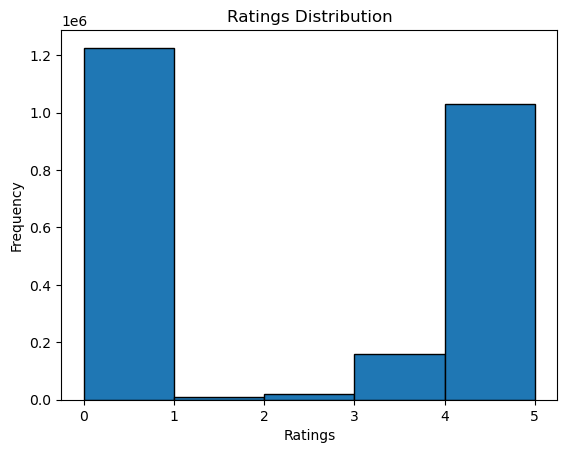

In [80]:
print(df['stars'].describe())  # includes mean, std, min, max

# Standard deviation (variation)
std_dev = df['stars'].std()
print(f"Standard Deviation: {std_dev:.2f}")

# Histogram
df['stars'].plot(kind='hist', bins=5, edgecolor='black', title='Ratings Distribution')
plt.xlabel('Ratings')
plt.show()

In [79]:
skewness_ratings = df['stars'].skew()
kurtosis_ratings = df['stars'].kurtosis()

skewness_ratings, kurtosis_ratings

(np.float64(0.08120735761080985), np.float64(-1.9260061280432985))

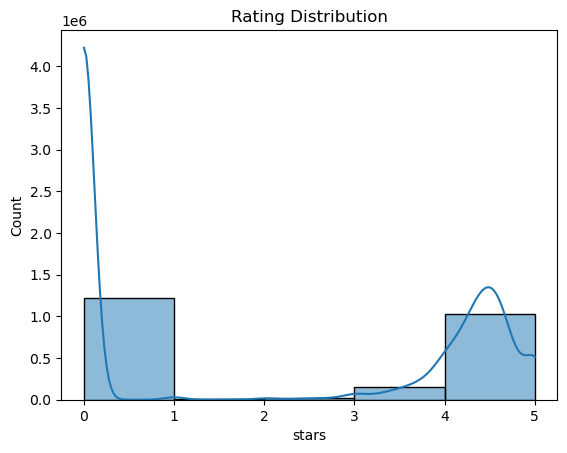

In [83]:
sns.histplot(df['stars'], kde=True, bins=5)
plt.title("Rating Distribution")
plt.show()

<Figure size 800x500 with 0 Axes>

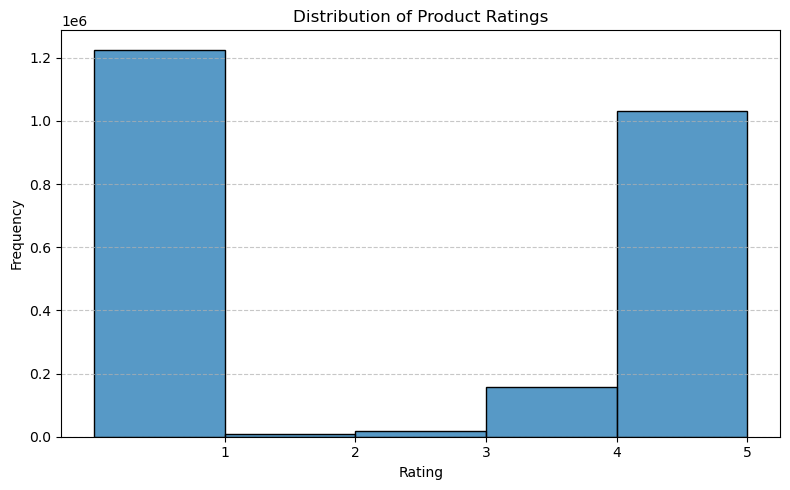

In [85]:
plt.figure(figsize=(8, 5))
sns.histplot(df['stars'], bins=5, kde=False, edgecolor='black')

plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))  # Assuming 1–5 scale
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()